In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("./penguins_size.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
cols_numeriche=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

In [8]:
def scatter_plot(ax, x_name, y_name):
    for specie in data["species"].unique():
        data_specie=data[data["species"]==specie]
        ax.scatter(data_specie[x_name], data_specie[y_name], s=5, label=specie)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    #ax.legend()

def histogram_plot(ax, x_name):
    for specie in data["species"].unique():
        data_specie=data[data["species"]==specie]
        ax.hist(data_specie[x_name], bins=15 , label=specie, alpha=0.5)
    ax.set_xlabel(x_name)
    ax.set_ylabel("Frequenza assoluta")
    #ax.legend()

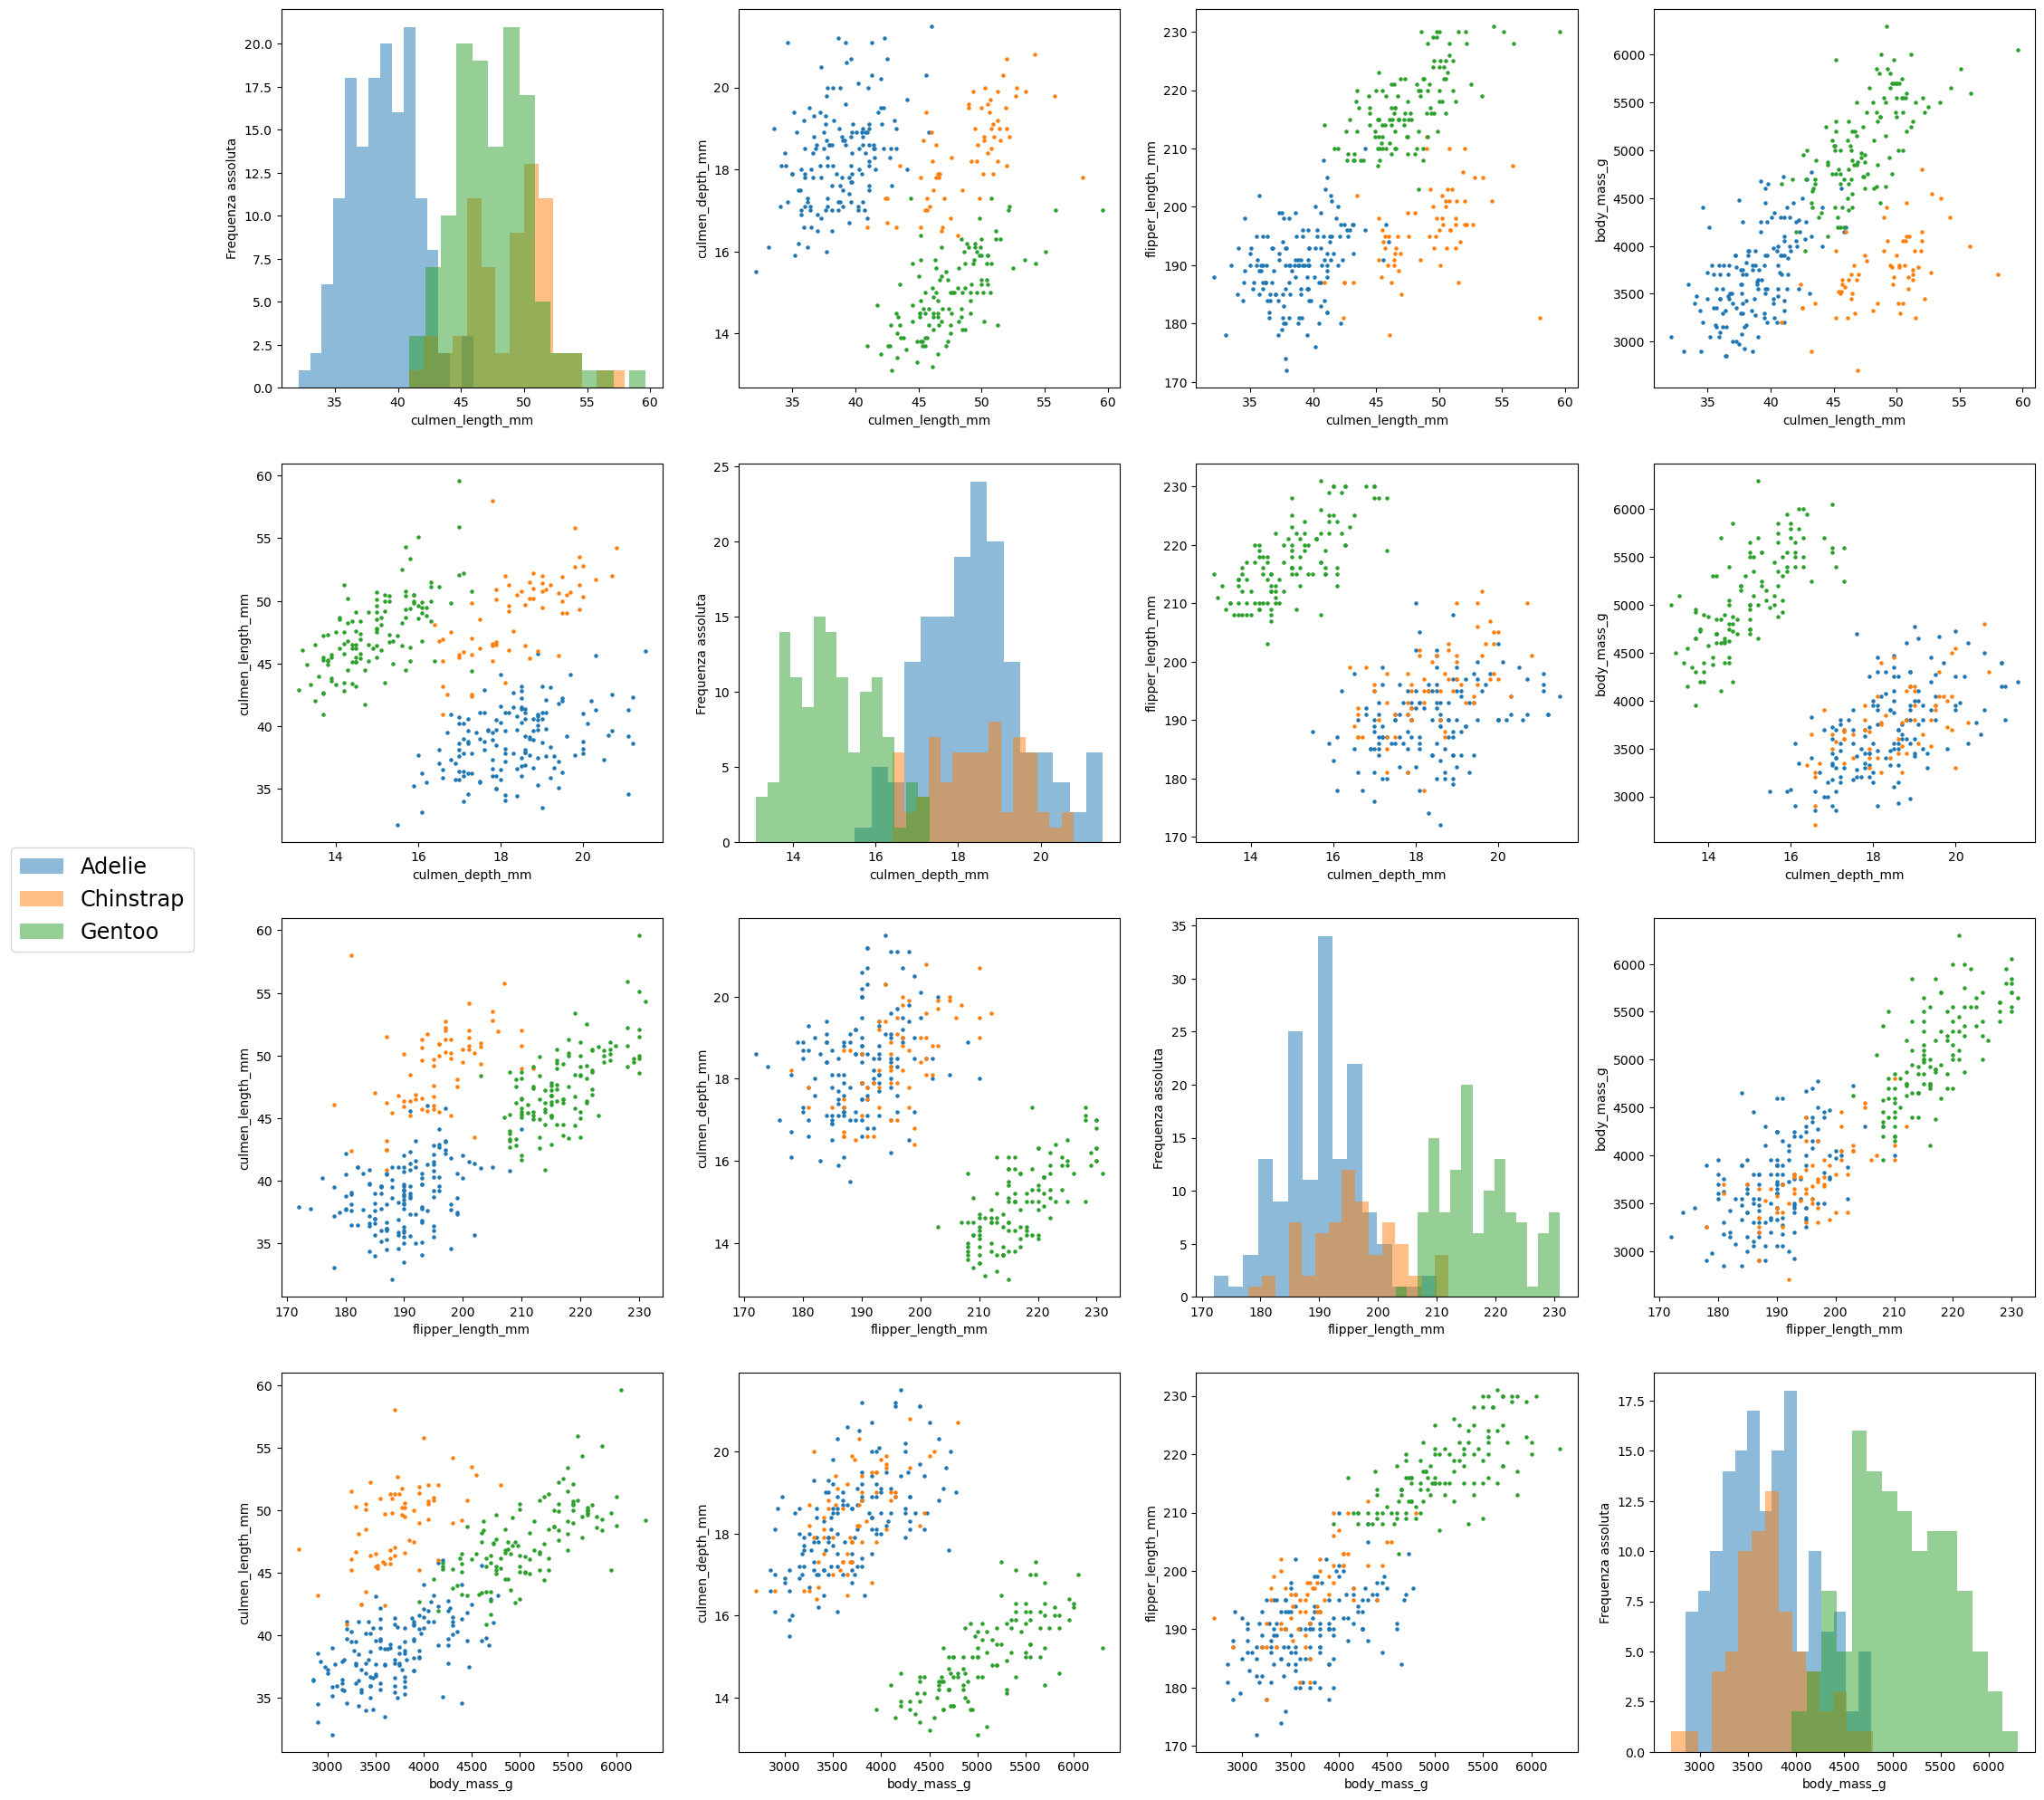

In [12]:
fig, axs = plt.subplots(figsize=(25, 25), nrows=4, ncols=4)
for i, col_1 in enumerate(cols_numeriche):
    for j, col_2 in enumerate(cols_numeriche):
        if i!=j:
            scatter_plot(axs[i, j], col_1 , col_2)
        else:
            histogram_plot(axs[i, j], col_1)

plt.savefig('./analisiPinguini.pdf')
fig.legend(data["species"].unique(), loc="center left", fontsize="xx-large")
plt.show()


In [18]:
def scatter_plot(ax, x_name, y_name, categoria):
    for cat in data[categoria].unique():
        data_cat=data[data[categoria]==cat]
        ax.scatter(data_cat[x_name], data_cat[y_name], s=5, label=cat)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    #ax.legend()

def histogram_plot(ax, x_name, categoria):
    for cat in data[categoria].unique():
        data_cat=data[data[categoria]==cat]
        ax.hist(data_cat[x_name], bins=15 , label=cat, alpha=0.5)
    ax.set_xlabel(x_name)
    ax.set_ylabel("Frequenza assoluta")
    #ax.legend()

def analizzaDataset(data, categoria):
    validCols = [data[d].dtype!="object" for d in data]
    cols_numeriche=data.columns[validCols]
    n=len(cols_numeriche)    
    fig, axs = plt.subplots(figsize=(25, 25), nrows=n, ncols=n)
    for i, col_1 in enumerate(cols_numeriche):
        for j, col_2 in enumerate(cols_numeriche):
            if i!=j:
                scatter_plot(axs[i, j], col_1 , col_2, categoria)
            else:
                histogram_plot(axs[i, j], col_1, categoria)
    
    plt.savefig('./analisiEffettuata.pdf')
    fig.legend(data[categoria].unique(), loc="center left", fontsize="xx-large")
    plt.show()
    

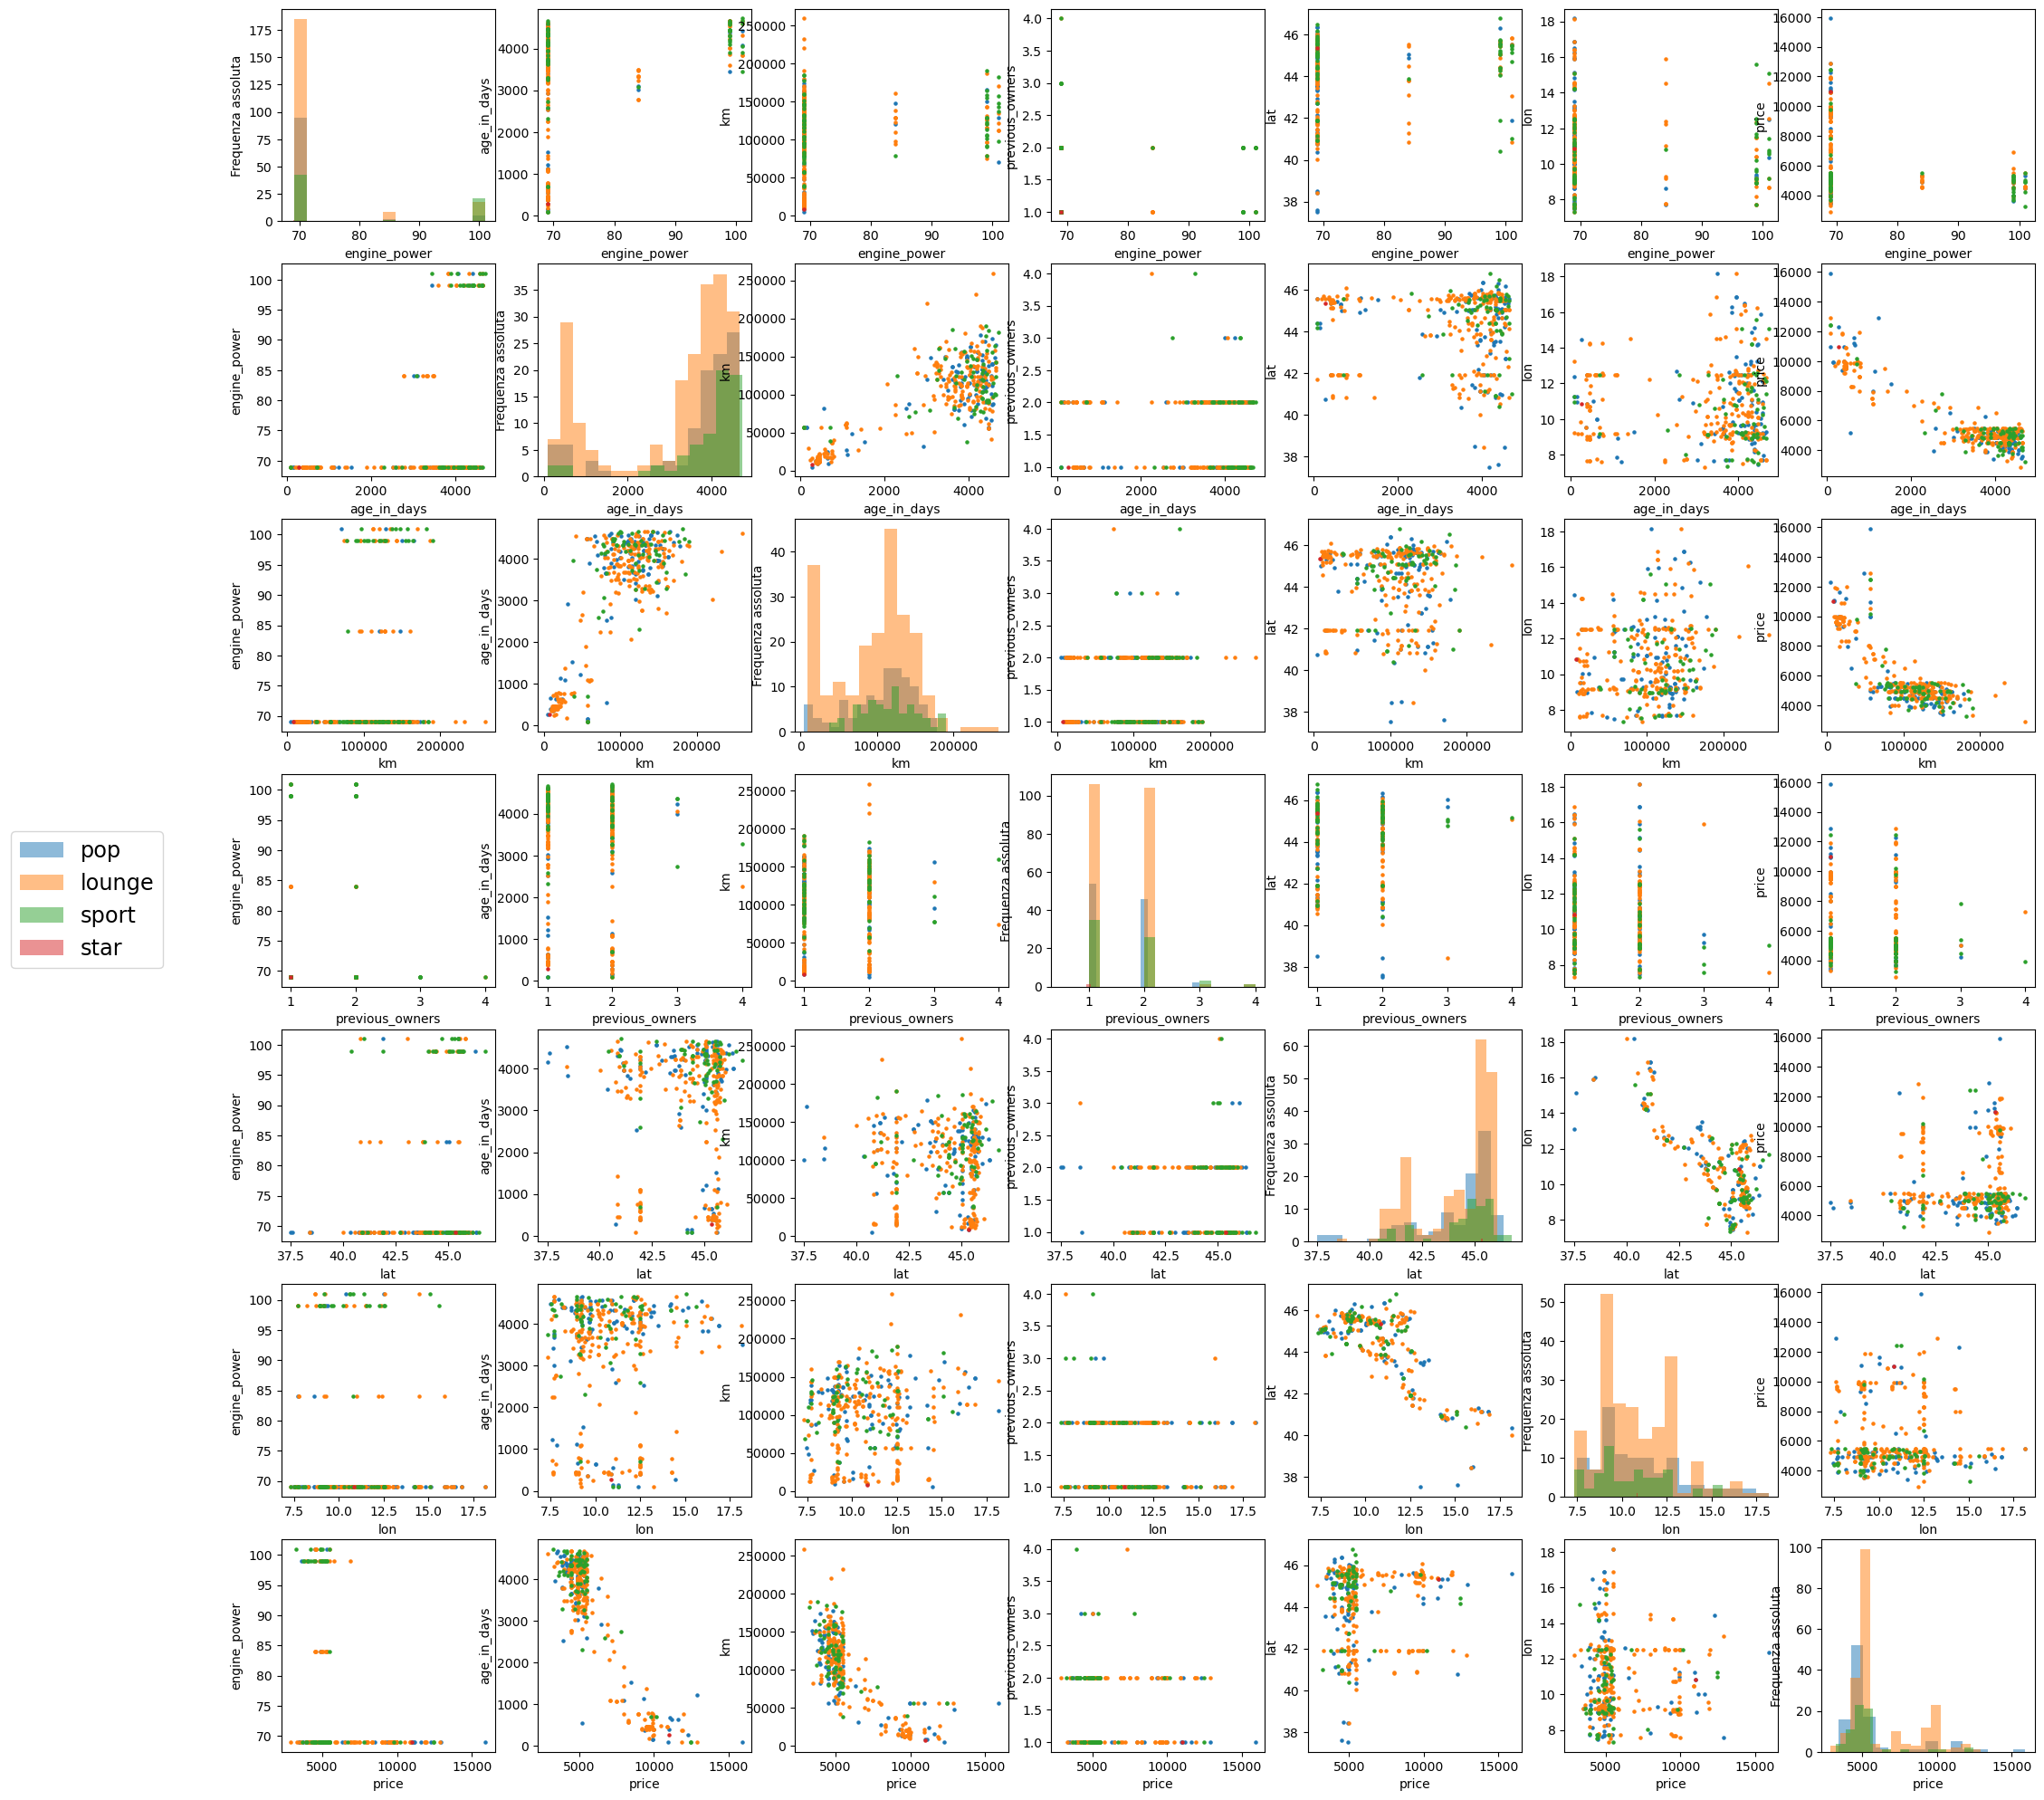

In [21]:
data=pd.read_csv("./Used_fiat_500_in_Italy_dataset.csv")
analizzaDataset(data, "model")